## Data cleaning & Initial exploration

In [1]:
import sqlite3
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from src.data_utils import get_connection,combine_files
from src.data import SQLRepository


**Read files into memory**

In [3]:
df=combine_files("../data/Download Data - STOCK_KE_XNAI_SCOM*.csv")
df.shape

(2499, 6)

**Store data into SQLite 3 database and read**

In [4]:
conn = get_connection()
repo= SQLRepository(conn)


In [5]:
# Insert data
repo.insert_table("scom_prices", df, if_exists="replace")

{'transations_successful': True, 'records_inserted': 2499}

In [6]:
df=repo.read_table("scom_prices")
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-05-15,16.20,16.50,16.20,16.35,"9,936,700"
2015-05-18,16.40,16.70,16.35,16.50,"7,844,400"
2015-05-19,16.50,16.75,16.50,16.60,"10,562,300"
2015-05-20,16.60,16.70,16.35,16.45,"10,062,000"
2015-05-21,16.45,16.55,16.25,16.30,"8,668,100"


In [7]:
df.shape

(2499, 5)

### Initial exploration
**Plot of closing prices of Safaricom shares since 2015**

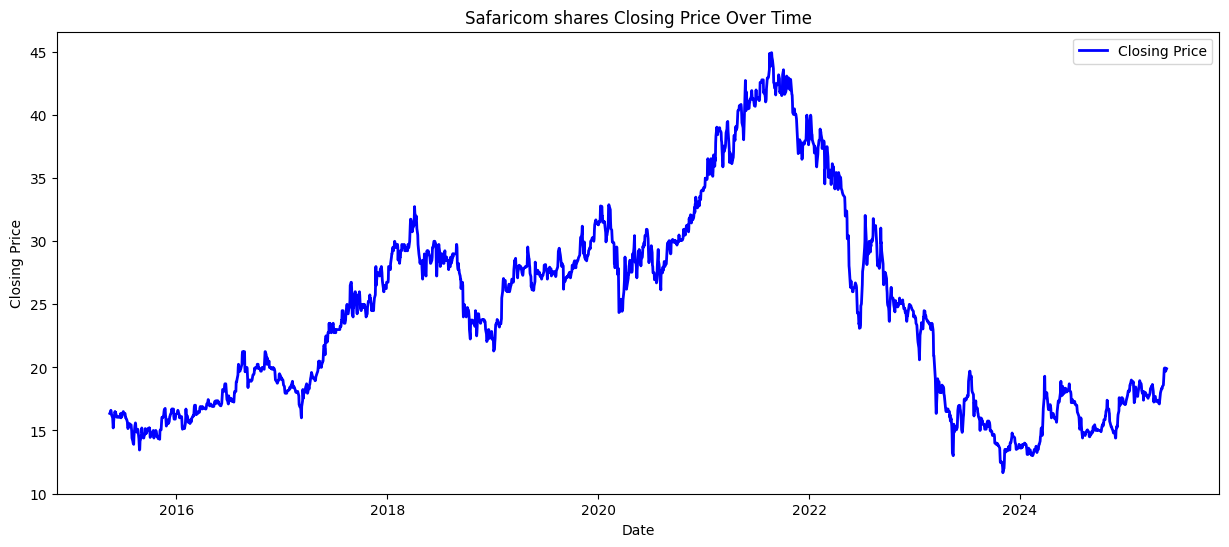

In [8]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(df.index, df['Close'], label='Closing Price', color='blue', linewidth=2)

# Label axes
ax.set_xlabel("Date")
ax.set_ylabel("Closing Price")
ax.set_title("Safaricom shares Closing Price Over Time")

# Add legend
ax.legend();


**Plot of return** <br>
A plot of return is better because it is easier to compare perfomance with other stocks.A return is the change in value in an investment, represented as a percentage.First value is NaN because there is no prev value to compare with.

In [11]:
df['return']=df['Close'].pct_change()*100
df.head()

,Open,High,Low,Close,Volume,return
Date,,,,,,
2015-05-15,16.20,16.50,16.20,16.35,"9,936,700",NaN
2015-05-18,16.40,16.70,16.35,16.50,"7,844,400",0.917431
2015-05-19,16.50,16.75,16.50,16.60,"10,562,300",0.606061
2015-05-20,16.60,16.70,16.35,16.45,"10,062,000",-0.903614
2015-05-21,16.45,16.55,16.25,16.30,"8,668,100",-0.911854


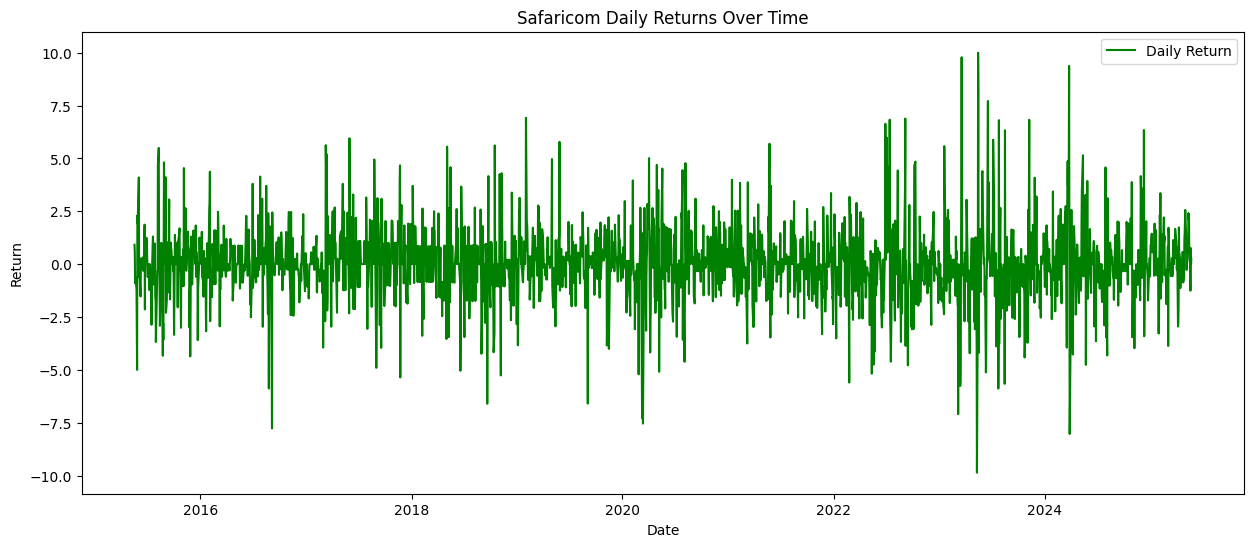

In [24]:
returns=df["return"].dropna()
# Plot returns
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(returns.index, returns, label="Daily Return", color='green')

# Label axes
ax.set_xlabel("Date")
ax.set_ylabel("Return")
ax.set_title("Safaricom Daily Returns Over Time")
# Add legend
ax.legend();